In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks', rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('talk')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [2]:
import os
import gffutils
import itertools
import numpy as np
import pandas as pd
from Bio import SeqIO
from scipy import stats
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio.SeqFeature import SeqFeature, FeatureLocation

In [3]:
phenotypes = {'deces': 'death',
 'choc': 'septic shock',
 'passage_en_rea': 'admission to ICU',
 'pe_urinaire': 'urinary tract',
 'pe_digestive': 'digestive tract'}

In [4]:
h_2 = []
for p in phenotypes:
    m = pd.read_csv(f'../out/associations/{p}/heritability.tsv',
                    sep='\t')
    m['phenotype'] = phenotypes[p]
    m = m.rename(columns={'h2': 'naive',
                          'h2_covariates': 'with covariates'})
    m['set'] = 'variants'
    m['dataset'] = 'full'
    h_2.append(m)
    m = pd.read_csv(f'../out/associations/{p}/heritability_septicoli.tsv',
                    sep='\t')
    m['phenotype'] = phenotypes[p]
    m = m.rename(columns={'h2': 'naive',
                          'h2_covariates': 'with covariates'})
    m['set'] = 'variants'
    m['dataset'] = 'Septicoli'
    h_2.append(m)
    m = pd.read_csv(f'../out/associations/{p}/heritability_colibafi.tsv',
                    sep='\t')
    m['phenotype'] = phenotypes[p]
    m = m.rename(columns={'h2': 'naive',
                          'h2_covariates': 'with covariates'})
    m['set'] = 'variants'
    m['dataset'] = 'Colibafi'
    h_2.append(m)
    m = pd.read_csv(f'../out/associations/{p}/heritability.tsv',
                    sep='\t')
    m['phenotype'] = phenotypes[p]
    m = m.rename(columns={'h2': 'naive',
                          'h2_covariates': 'with covariates'})
    m['set'] = 'variants'
    m['dataset'] = 'full'
    h_2.append(m)
    m = pd.read_csv(f'../out/associations/{p}/heritability_lineages.tsv',
                    sep='\t')
    m['phenotype'] = phenotypes[p]
    m = m.rename(columns={'h2': 'naive',
                          'h2_covariates': 'with covariates'})
    m['set'] = 'phylogroup'
    m['dataset'] = 'full'
    h_2.append(m)
    m = pd.read_csv(f'../out/associations/{p}/heritability_septicoli_lineages.tsv',
                    sep='\t')
    m['phenotype'] = phenotypes[p]
    m = m.rename(columns={'h2': 'naive',
                          'h2_covariates': 'with covariates'})
    m['set'] = 'phylogroup'
    m['dataset'] = 'Septicoli'
    h_2.append(m)
    m = pd.read_csv(f'../out/associations/{p}/heritability_colibafi_lineages.tsv',
                    sep='\t')
    m['phenotype'] = phenotypes[p]
    m = m.rename(columns={'h2': 'naive',
                          'h2_covariates': 'with covariates'})
    m['set'] = 'phylogroup'
    m['dataset'] = 'Colibafi'
    h_2.append(m)
h_2 = pd.concat(h_2)

In [5]:
h = h_2[h_2['lik'] == 'normal'].melt(id_vars=['phenotype', 'set', 'dataset'])
h = h[h['variable'] != 'lik']

In [6]:
h

,phenotype,set,dataset,variable,value
35,death,variants,full,naive,0.0
36,death,variants,Septicoli,naive,0.0
37,death,variants,Colibafi,naive,0.168324
38,death,variants,full,naive,0.0
39,death,phylogroup,full,naive,0.0
...,...,...,...,...,...
100,digestive tract,variants,Colibafi,with covariates,0.26493
101,digestive tract,variants,full,with covariates,0.276832
102,digestive tract,phylogroup,full,with covariates,0.051525
103,digestive tract,phylogroup,Septicoli,with covariates,0.03269


In [7]:
h['label'] = [f'{x} + covariates'
              if y == 'with covariates'
              else f'{x}'
              for x, y in h[['set', 'variable']].values]

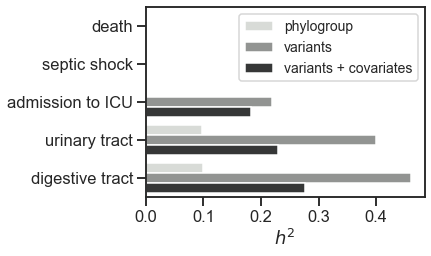

In [8]:
plt.figure(figsize=(5, 3.5))

sns.barplot(data=h[h['dataset'] == 'full'],
            y='phenotype',
            x='value',
            hue='label',
            hue_order=['phylogroup', 'variants', 'variants + covariates'],
            palette=['xkcd:light grey', 'xkcd:grey', 'xkcd:dark grey'])

plt.xlabel('$h^2$')
plt.ylabel('')
plt.legend(loc='upper right',
           fontsize=14,
           facecolor='white')

plt.savefig('heritability.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('heritability.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

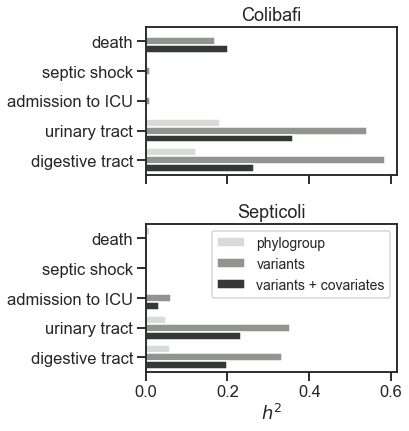

In [9]:
cp = sns.catplot(data=h[h['dataset'] != 'full'],
                 kind='bar',
                 y='phenotype',
                 x='value',
                 hue='label',
                 row='dataset',
                 height=3,
                 aspect=2,
                 row_order=['Colibafi', 'Septicoli'],
                 hue_order=['phylogroup', 'variants', 'variants + covariates'],
                 palette=['xkcd:light grey', 'xkcd:grey', 'xkcd:dark grey'],
                 legend=None
                )

cp.set_titles(row_template='{row_name}')
cp.set_xlabels('$h^2$')
cp.set_ylabels('')
sns.despine(top=False,
            right=False)
plt.legend(loc='upper right',
           fontsize=14,
           facecolor='white')

plt.savefig('heritability_studies.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('heritability_studies.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

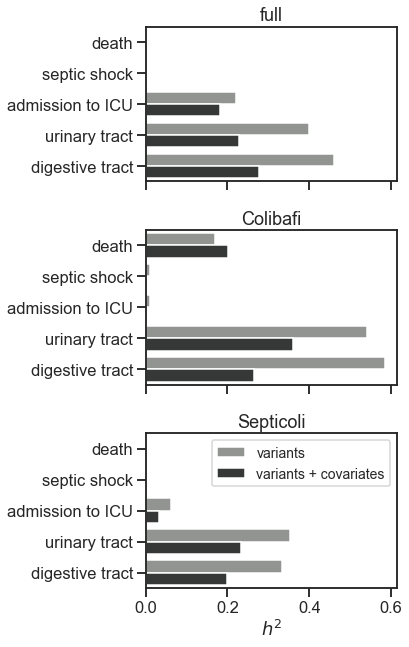

In [10]:
cp = sns.catplot(data=h,
                 kind='bar',
                 y='phenotype',
                 x='value',
                 hue='label',
                 row='dataset',
                 height=3,
                 aspect=2,
                 row_order=['full', 'Colibafi', 'Septicoli'],
                 hue_order=['variants', 'variants + covariates'],
                 palette=['xkcd:grey', 'xkcd:dark grey'],
                 legend=None)

cp.set_titles(row_template='{row_name}')
cp.set_xlabels('$h^2$')
cp.set_ylabels('')
sns.despine(top=False,
            right=False)
plt.legend(loc='upper right',
           fontsize=14,
           facecolor='white')

plt.savefig('heritability_all.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('heritability_all.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [11]:
res = []
for pheno in phenotypes:
    u = pd.read_csv(f'../out/associations/{pheno}/unitigs_filtered.tsv')
    g = pd.read_csv(f'../out/associations/{pheno}/gpa_filtered.tsv')
    s = pd.read_csv(f'../out/associations/{pheno}/struct_filtered.tsv')
    res.append((phenotypes[pheno],
                'lmm',
                'with covariates',
                u.shape[0],
                g.shape[0],
                s.shape[0]))
    u = pd.read_csv(f'../out/associations/{pheno}/nc_unitigs_filtered.tsv')
    g = pd.read_csv(f'../out/associations/{pheno}/nc_gpa_filtered.tsv')
    s = pd.read_csv(f'../out/associations/{pheno}/nc_struct_filtered.tsv')
    res.append((phenotypes[pheno],
                'lmm',
                'naïve',
                u.shape[0],
                g.shape[0],
                s.shape[0]))
r = pd.DataFrame(res,
                 columns=['phenotype', 'type', 'set',
                          'unitigs', 'gene presence absence', 'structural variants'])

In [12]:
r

,phenotype,type,set,unitigs,gene presence absence,structural variants
0,death,lmm,with covariates,0,0,0
1,death,lmm,naïve,0,0,0
2,septic shock,lmm,with covariates,0,0,0
3,septic shock,lmm,naïve,1,2,0
4,admission to ICU,lmm,with covariates,1,0,1
5,admission to ICU,lmm,naïve,1,0,0
6,urinary tract,lmm,with covariates,88,10,0
7,urinary tract,lmm,naïve,177,10,2
8,digestive tract,lmm,with covariates,0,8,0
9,digestive tract,lmm,naïve,53,7,1


In [13]:
r = r.melt(id_vars=['phenotype', 'type', 'set'])

In [14]:
r.columns = ['phenotype', 'type', 'set', 'variant type', 'variants']
r['ln(variants)'] = r['variants'] + 1

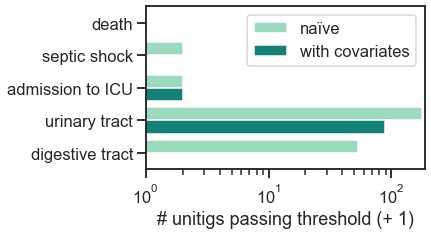

In [15]:
plt.figure(figsize=(5, 3))
sns.barplot(data=r[(r['type'] == 'lmm') & (r['variant type'] == 'unitigs')], 
            x='ln(variants)', y='phenotype', hue='set',
            hue_order=['naïve', 'with covariates'],
            palette=['xkcd:light teal',
                     'xkcd:teal'])
plt.xlim(1)
plt.ylabel('')
plt.xlabel('# unitigs passing threshold (+ 1)')

plt.legend(facecolor='w')

plt.xscale('log')

plt.savefig('unitigs.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('unitigs.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [16]:
res = []
for pheno in phenotypes:
    try:
        u = pd.read_csv(f'../out/associations/{pheno}/unitigs_filtered.tsv',
                        index_col=0, sep='\t')
        g1 = u.index
    except:
        g1 = set()
    try:
        u = pd.read_csv(f'../out/associations/{pheno}/nc_unitigs_filtered.tsv',
                        index_col=0, sep='\t')
        g2 = u.index
    except:
        g2 = set()
    try:
        p = len(g1.intersection(g2)) / min([len(g1), len(g2)])
    except:
        p = 0
    print(pheno, len(g1), len(g2), len(g1.intersection(g2)),
          p)

deces 0 0 0 0
choc 0 1 0 0
passage_en_rea 1 1 1 1.0
pe_urinaire 88 177 88 1.0
pe_digestive 0 53 0 0


In [17]:
res = []
for pheno in phenotypes:
    try:
        u = pd.read_csv(f'../out/associations/{pheno}/summary.tsv')
        shape = u.shape[0]
    except:
        shape = 0
    res.append((phenotypes[pheno],
                'lmm',
                'with covariates',
                shape))
    try:
        u = pd.read_csv(f'../out/associations/{pheno}/nc_summary.tsv')
        shape = u.shape[0]
    except:
        shape = 0
    res.append((phenotypes[pheno],
                'lmm',
                'naïve',
                shape))
r = pd.DataFrame(res,
                 columns=['phenotype', 'type', 'set',
                          'genes'])

In [18]:
r

,phenotype,type,set,genes
0,death,lmm,with covariates,0
1,death,lmm,naïve,0
2,septic shock,lmm,with covariates,0
3,septic shock,lmm,naïve,0
4,admission to ICU,lmm,with covariates,0
5,admission to ICU,lmm,naïve,0
6,urinary tract,lmm,with covariates,12
7,urinary tract,lmm,naïve,12
8,digestive tract,lmm,with covariates,0
9,digestive tract,lmm,naïve,0


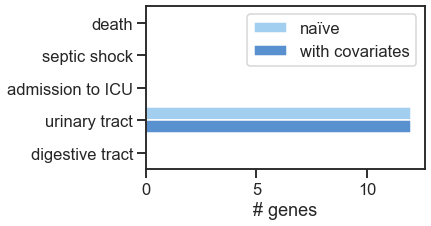

In [19]:
plt.figure(figsize=(5, 3))
sns.barplot(data=r[r['type'] == 'lmm'],
            x='genes', y='phenotype', hue='set',
            hue_order=['naïve', 'with covariates'],
            palette=['xkcd:light blue',
                     'xkcd:dark sky blue'])
# plt.xlim(1)
plt.ylabel('')
plt.xlabel('# genes')

plt.legend(facecolor='w')

plt.savefig('genes.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('genes.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [20]:
res = []
for pheno in phenotypes:
    try:
        u = pd.read_csv(f'../out/associations/{pheno}/summary.tsv',
                        sep='\t', index_col=0)
        g1 = u.index
        u['set'] = 'with covariates'
        u['phenotype'] = pheno
        u['p'] = -np.log10(u['avg-lrt-pvalue'])
        res.append(u)
    except:
        g1 = set()
    try:
        u = pd.read_csv(f'../out/associations/{pheno}/nc_summary.tsv',
                        sep='\t', index_col=0)
        g2 = u.index
        u['set'] = 'naïve'
        u['phenotype'] = pheno
        u['p'] = -np.log10(u['avg-lrt-pvalue'])
        res.append(u)
    except:
        g2 = set()
    print(pheno, len(g1), len(g2), len(g1.intersection(g2)))
r = pd.concat(res)

deces 0 0 0
choc 0 0 0
passage_en_rea 0 0 0
pe_urinaire 12 12 12
pe_digestive 0 0 0


In [21]:
r = r[(r['phenotype'].isin(['pe_urinaire', 'pe_digestive'])) &
      (r['set'] == 'with covariates')]

In [22]:
puri = r[r['phenotype'] == 'pe_urinaire'].index
pdige = r[r['phenotype'] == 'pe_digestive'].index
both = puri.intersection(pdige)

In [23]:
len(puri), len(pdige), len(both)

(12, 0, 0)

In [24]:
r['pheno'] = ['both' if x in both
              else 'single'
              for x in r.index]

In [25]:
r['gene'] = ['pap operon' if 'pap' in x
             else 'other'
             for x in r.index]

In [26]:
r['avg-odds-ratio'] = np.power(2, r['avg-beta'])

In [27]:
r['entry'] = ['urinary tract' if 'urinaire' in x
              else 'digestive tract'
              for x in r['phenotype'].values]

In [28]:
# sns.relplot(data=r, hue='entry',
#             style='gene',
#             x='avg-odds-ratio', y='avg-lrt-pvalue',
#             height=4.5,
#             palette=['#bf9005', '#653700'],
#             style_order=['pap operon', 'other'],
#             markers=['X', 'o'])
# plt.legend(facecolor='w',
#            loc='center left',
#            bbox_to_anchor=(1, 0.5))
# plt.yscale('log')
# plt.xlabel('Average odds ratio')
# plt.ylabel('Average association p-value')
# plt.axvline(1, ls='dashed', color='grey')
# sns.despine(top=False, right=False)

# plt.savefig('hits.png',
#             dpi=300,
#             bbox_inches='tight',
#             transparent=True)
# plt.savefig('hits.svg',
#             dpi=300, bbox_inches='tight',
#             transparent=True);

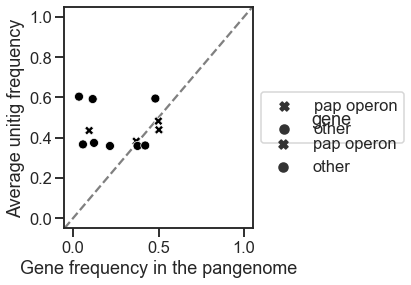

In [29]:
sns.relplot(data=r[r['entry'] == 'urinary tract'],
            style='gene',
            x='pangenome-frequency', y='avg-af',
            height=4, aspect=1,
            style_order=['pap operon', 'other'],
            markers=['X', 'o'],
            color='k')

plt.plot([-0.05, 1.05],
         [-0.05, 1.05],
         ls='dashed', color='grey',
         zorder=-1)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.legend(facecolor='w',
           loc='center left',
           bbox_to_anchor=(1, 0.5))

plt.xlabel('Gene frequency in the pangenome')
plt.ylabel('Average unitig frequency')
sns.despine(top=False, right=False)

plt.savefig('hits_frequency.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('hits_frequency.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [30]:
r = None
for pheno in ['pe_urinaire', 'pe_digestive']:
    u = pd.read_csv(f'../out/associations/{pheno}/unitigs.tsv',
                    sep='\t', index_col=0)
    u = u.rename(columns={'lrt-pvalue': f'{pheno}-lrt-pvalue'})
    u[pheno] = np.power(2, u['beta'])
    if r is None:
        r = u[[pheno, f'{pheno}-lrt-pvalue']]
    else:
        r = r.join(u[[pheno, f'{pheno}-lrt-pvalue']], how='inner')

In [31]:
stats.linregress(r['pe_urinaire'],
                 r['pe_digestive'])

LinregressResult(slope=-0.7604199041012414, intercept=1.7616999731381668, rvalue=-0.7639895855619959, pvalue=0.0, stderr=0.0004299139855427197, intercept_stderr=0.00043275938433360526)

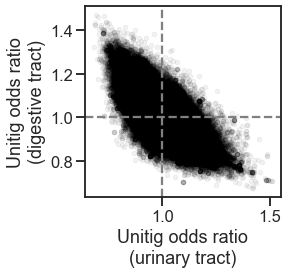

In [32]:
plt.figure(figsize=(3.5, 3.5))

plt.plot(r['pe_urinaire'], r['pe_digestive'], 'k.',
         rasterized=True, alpha=0.05)

plt.axvline(1, ls='dashed', color='grey')
plt.axhline(1, ls='dashed', color='grey')

plt.xlabel('Unitig odds ratio\n(urinary tract)')
plt.ylabel('Unitig odds ratio\n(digestive tract)')

plt.savefig('pe_comparisons.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('pe_comparisons.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [33]:
s = pd.read_csv('../out/associations/pe_urinaire/summary.tsv', sep='\t', index_col=0)

In [34]:
pap = {x for x in s.index
       if x.startswith('pap')}

In [35]:
opgE = {x for x in s.index
        if x.startswith('opgE')}

In [36]:
p = pd.read_csv('../out/panaroo/gene_presence_absence_roary.csv', sep=',', index_col=0, low_memory=False)

In [37]:
p = p.drop(columns=p.columns[:13])

In [38]:
pap_genes = {}
for strain, genes in p.loc[pap].apply(lambda x: {y for g in x.values if str(g) != 'nan' for y in g.split(';')}).iteritems():
    hits = set(p.loc[s.index, strain].dropna().values)
    if len(hits.intersection(genes)) == 0:
        pap_genes[strain] = set()
        continue
    pap_genes[strain] = hits.intersection(genes)

In [39]:
opgE_genes = {}
for strain, genes in p.loc[opgE].apply(lambda x: {y for g in x.values if str(g) != 'nan' for y in g.split(';')}).iteritems():
    hits = set(p.loc[s.index, strain].dropna().values)
    if len(hits.intersection(genes)) == 0:
        opgE_genes[strain] = set()
        continue
    opgE_genes[strain] = hits.intersection(genes)

In [40]:
flags = {}
res = []
for strain in p.columns:
    if len(pap_genes[strain]) == 0 and len(opgE_genes[strain]) == 0:
#         print(f'{strain} neither')
        pass
    elif len(pap_genes[strain]) == 0:
#         print(f'{strain} no pap')
        pass
    elif len(opgE_genes[strain]) == 0:
#         print(f'{strain} no opgE')
        pass
    else:
        flags[strain] = set()
        seqs = {x.id: len(x) for x in SeqIO.parse(f'../data/fixed_fastas/{strain}.fasta',
                                                  'fasta')}
        gff = gffutils.create_db(f'../data/gffs/{strain}.gff', ':memory:')
        for g1, g2 in itertools.product(pap_genes[strain],
                                        opgE_genes[strain]):
            try:
                gene1 = gff[g1]
                gene2 = gff[g2]
            except:
                continue
            
            if gene1.chrom != gene2.chrom:
                dist = min([gene1.start, seqs[gene1.chrom] - gene1.stop])
                res.append((strain, 'diff. contig', dist))
                if dist > 10000:
                    flags[strain].add(f'diff. contig - far {dist}')
                else:
                    flags[strain].add(f'diff. contig {dist}')
            else:
                dist = min([abs(x-y) for x, y in itertools.product([gene1.start,
                                                                gene1.stop],
                                                               [gene2.start,
                                                                gene2.stop])])
                res.append((strain, 'same contig', dist))
                if dist > 15000:
                    flags[strain].add(f'same contig - far {dist}')
                else:
                    flags[strain].add(f'same contig - close {dist}')
        flags_str = ' / '.join(sorted(flags[strain]))
#         print(f'{strain} {flags_str}')
r = pd.DataFrame(res, columns=['strain', 'type', 'distance'])

In [41]:
n = r.groupby(['type', 'strain'])['distance'].max().reset_index()

In [42]:
r.groupby('type')['strain'].nunique()

type
diff. contig    201
same contig     118
Name: strain, dtype: int64

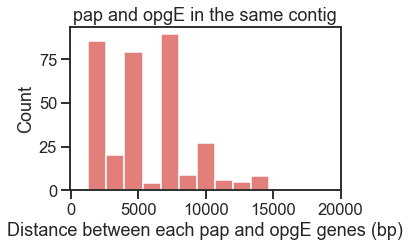

In [43]:
sns.displot(data=r[(r['type'] == 'same contig') &
                   (r['distance'] < 50000)],
            x='distance', kind='hist', height=3.5,
            aspect=1.5, bins=10, color='xkcd:pale red')
plt.title('pap and opgE in the same contig')
plt.xlabel('Distance between each pap and opgE genes (bp)')
plt.xlim(-100, 20000)

sns.despine(right=False, top=False)

plt.savefig('distance_same.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('distance_same.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

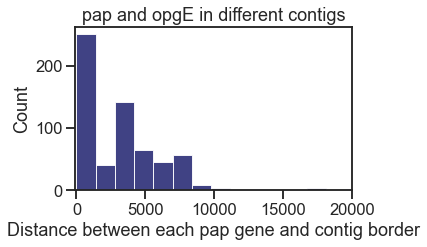

In [44]:
sns.displot(data=r[(r['type'] == 'diff. contig') &
                   (r['distance'] < 50000)],
            x='distance', kind='hist', height=3.5,
            aspect=1.5, bins=30, color='xkcd:dark blue')
plt.title('pap and opgE in different contigs')
plt.xlabel('Distance between each pap gene and contig border')
plt.xlim(-100, 20000)
sns.despine(right=False, top=False)

plt.savefig('distance_diff.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('distance_diff.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [45]:
r[r['type'] == 'same contig'].sort_values('distance')

,strain,type,distance
811,R1B5H8,same contig,1281
202,H1-002-0045-V-M,same contig,1281
192,H1-002-0037-M-F,same contig,1281
646,R1B1A6,same contig,1281
818,R1B5A11,same contig,1281
...,...,...,...
497,H1-006-0003-S-L,same contig,14712
849,R1B6F4,same contig,14712
6,H1-001-0010-R-N,same contig,14712
465,H1-005-0045-G-C,same contig,14712


In [46]:
r[r['type'] == 'diff. contig'].sort_values('distance')

,strain,type,distance
666,R1B1E8,diff. contig,2
67,H1-001-0084-A-S,diff. contig,2
734,R1B3A1,diff. contig,3
673,R1B1B10,diff. contig,3
191,H1-002-0036-S-N,diff. contig,6
...,...,...,...
276,H1-003-0045-B-K,diff. contig,24811
321,H1-003-0085-C-J,diff. contig,25552
492,H1-006-0002-F-L,diff. contig,37041
496,H1-006-0002-F-L,diff. contig,40382


In [47]:
strains = set(r[r['type'] == 'same contig']['strain'].unique())

In [48]:
try:
    os.mkdir('genes')
except:
    pass

In [49]:
pg = pd.read_csv('../data/Strain_typing.csv', sep=',')

In [50]:
for phylo in sorted(pg[pg['Strain'].isin(strains)]['Phylogroup'].unique()):
    print(phylo, sorted(pg[(pg['Strain'].isin(strains)) &
                           (pg['Phylogroup'] == phylo)]['Strain'].values))

A ['H1-006-0014-H-P', 'R1B6E6', 'R1B6F7']
B1 ['H1-001-0010-R-N', 'R1B6I11']
B2 ['H1-001-0011-M-Y', 'H1-001-0014-F-H', 'H1-001-0033-G-M', 'H1-001-0050-M-T', 'H1-001-0069-L-A', 'H1-001-0079-V-O', 'H1-001-0082-P-K', 'H1-001-0083-D-D', 'H1-001-0085-F-D', 'H1-001-0098-B-K', 'H1-001-0101-D-A', 'H1-001-0138-N-F', 'H1-001-0140-M-O', 'H1-001-0141-G-Y', 'H1-001-0157-P-A', 'H1-002-0001-M-C', 'H1-002-0005-B-J', 'H1-002-0037-M-F', 'H1-002-0068-R-E', 'H1-002-0073-C-C', 'H1-002-0074-R-S', 'H1-002-0075-S-Y', 'H1-003-0026-R-A', 'H1-003-0032-M-L', 'H1-003-0049-H-A', 'H1-003-0056-S-G', 'H1-003-0066-D-R', 'H1-003-0085-C-J', 'H1-003-0089-N-A', 'H1-003-0095-L-C', 'H1-003-0102-N-F', 'H1-003-0122-K-R', 'H1-004-0005-J-I', 'H1-004-0006-D-E', 'H1-004-0032-M-R', 'H1-004-0033-B-M', 'H1-004-0038-D-S', 'H1-004-0039-M-M', 'H1-005-0011-B-M', 'H1-005-0017-S-M', 'H1-005-0020-C-M', 'H1-005-0036-K-J', 'H1-005-0044-R-A', 'H1-006-0002-F-L', 'H1-006-0017-B-Y', 'H1-006-0019-C-M', 'H1-006-0026-L-L', 'H1-006-0028-D-J', 'H1-007-

In [51]:
for strain in strains:
    print(strain)
    gff = gffutils.create_db(f'../data/gffs/{strain}.gff', ':memory:')

    genes = sorted(pap_genes[strain].union(opgE_genes[strain]))

    # check if there's more than one chromosome here
    # pick the one with the most genes
    chroms = [gff[x].seqid for x in genes]
    if len(set(chroms)) > 1:
        dc = {x: chroms.count(x)
              for x in set(chroms)}
        chrom = sorted(dc, key=lambda x: dc[x])[-1]
        genes = [x for x in genes
                 if gff[x].seqid == chrom]
    else:
        chrom = gff[genes[0]].seqid
    start = min([gff[x].start for x in genes])
    end = max([gff[x].end for x in genes])

    start -= 5000
    end += 5000
    if start < 0:
        start = 0

    region = gff.region(f'{chrom}:{start}-{end}')
    gd = GenomeDiagram.Diagram('associated')
    track = gd.new_track(1,
                         name=f'{strain}',
                         greytrack=True)
    features = track.new_set()

    pmin = None
    pmax = None

    hits = set(p.loc[s.index, strain].dropna().values)

    for f in region:
        if f.featuretype != 'gene':
            continue
        locus = f.attributes['ID'][0].replace('_gene', '')
        gmin = int(f.start)
        gmax = int(f.end)
        if pmin is None or gmin < pmin:
            pmin = gmin
        if pmax is None or gmax > pmax:
            pmax = gmax
        if f.strand == '+':
            fl = FeatureLocation(f.start, f.end, strand=1)
        else:
            fl = FeatureLocation(f.start, f.end, strand=-1)
        sf = SeqFeature(location=fl,
                        type=f.featuretype)
        if locus in hits:
            color = 'blue'
        else:
            color = 'grey'
        features.add_feature(sf,
                             label=True,
                             name=f.attributes.get('Name', [locus])[0],
                             color=color,
                             label_size=5,
                             label_angle=90,
                             label_position='middle',
                             sigil='ARROW',
                             arrowshaft_height=0.5)
    gd.draw(format='linear',
            fragments=1,
            orientation='landscape',
            start=pmin, end=pmax,
            pagesize=(((pmax - pmin)/1000)*cm, 3*cm))
    gd.write(f'genes/{strain}.svg', 'SVG')

H1-002-0068-R-E
R1B2A4
H1-001-0010-R-N
H1-002-0075-S-Y
H1-001-0050-M-T
H1-004-0005-J-I
H1-006-0002-F-L
H1-003-0085-C-J
H1-007-0018-T-J
R1B1F2
H1-005-0011-B-M
R1B3E4
R1B15C2
H1-002-0055-L-M
H1-002-0001-M-C
H1-002-0073-C-C
H1-006-0014-H-P
R1B3A5
H1-002-0045-V-M
H1-005-0044-R-A
H1-006-0004-F-M
H1-001-0014-F-H
H1-003-0074-F-B
H1-004-0024-M-R
H1-004-0033-B-M
R1B6F19
R1B13G9
R1B1F10
H1-003-0049-H-A
R1B4F3
R1B6H13
R1B5D8
H1-005-0036-K-J
H1-003-0022-D-M
H1-004-0006-D-E
H1-001-0085-F-D
H1-001-0082-P-K
H1-007-0032-B-M
H1-002-0003-L-L
H1-006-0017-B-Y
H1-004-0039-M-M
H1-005-0007-B-J
H1-003-0102-N-F
R1B5D5
H1-002-0074-R-S
R1B6E6
H1-001-0006-M-A
H1-004-0034-B-S
R1B1F1
R1B1I12
R1B5A11
R1B6I3
R1B1E15
H1-001-0143-B-M
H1-007-0040-B-Y
R1B1F6
H1-003-0026-R-A
R1B6F4
H1-003-0056-S-G
R1B1I8
R1B6I11
R1B1A6
H1-003-0032-M-L
H1-001-0141-G-Y
H1-007-0012-A-V
H1-007-0035-S-G
H1-001-0098-B-K
H1-005-0020-C-M
R1B3F5
H1-005-0017-S-M
H1-007-0009-T-R
R1B13F10
H1-002-0005-B-J
R1B1C3
H1-001-0101-D-A
R1B2C11
R1B13C8
R1B2B3
